# (Ford GoBike System Data)
## by (Amal Aljabri)

## Investigation Overview

In this investigation, I wanted to look at the characteristics of Ford GoBike system data covering the greater San Francisco Bay area. The main focus was on days of the week, hours of the day, trip duration, user type, user age, and gender.

## Dataset Overview

The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
from IPython.core.display import display
sns.set(rc={'figure.figsize':(14,6)})

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
# data wrangling, removing inconsistent or missing data and creating extra columns

df = df.astype({'start_time': 'datetime64', 'end_time': 'datetime64'}, copy=False)

df = df[~ (df['start_station_id'].isnull())]

df = df[~ (df['member_birth_year'].isnull() | df['member_gender'].isnull())]

df = df.query('member_birth_year > 1931')

df['week_day'] = df['start_time'].dt.day_name()
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_classes = pd.api.types.CategoricalDtype(ordered = True, categories = weekday)
df['week_day'] = df['week_day'].astype(weekday_classes)

df['start_hour'] = df['start_time'].dt.hour

df['duration_minutes'] = df['duration_sec'] / 60

df['member_age'] = 2021 - df['member_birth_year']

## Number of bike trips used per week day

The number of bike trips is higher on work days (Monday, Tuesday, Wednesday, Thursday, Friday) and lower on weekends days (Saturday, Sunday) in San Francisco.


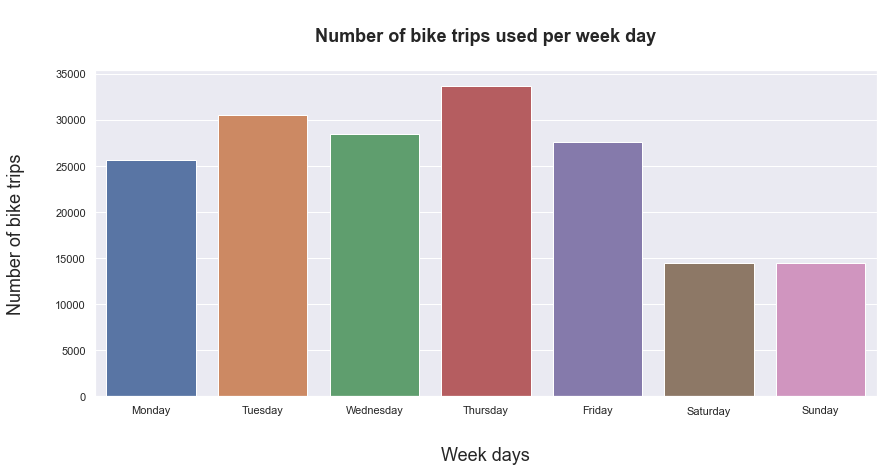

In [5]:
sns.countplot(data = df, x = 'week_day')
plt.title('\nNumber of bike trips used per week day', 
          y = 1.07, 
          fontsize = 18, 
          fontweight = 'bold')
plt.xlabel('Week days', 
           fontsize = 18, 
           labelpad=30)
plt.ylabel('Number of bike trips', 
           fontsize = 18, 
           labelpad=30)
plt.show()

## Distribution of bike trips used per day hour

The distribution of bike trips used per day hour is popular between 8-9 AM and 4-6 PM.

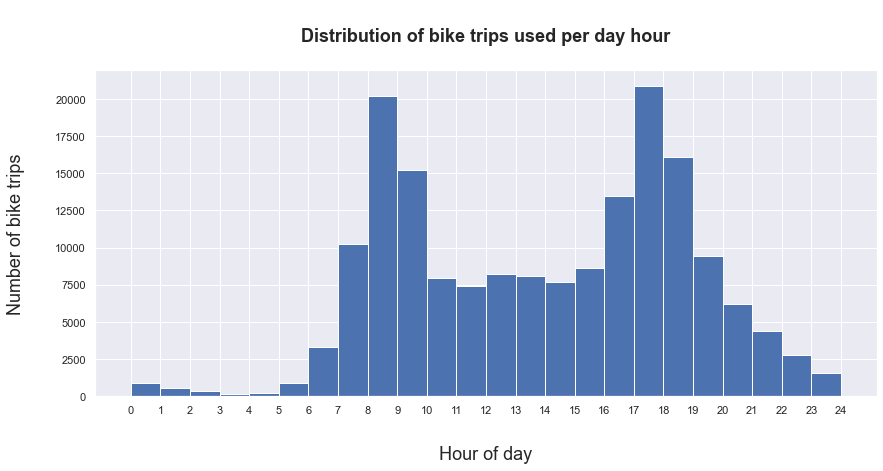

In [6]:
plt.hist(data = df, x = 'start_hour', bins = np.arange(0,23+2,1))
plt.title('\nDistribution of bike trips used per day hour', 
          y = 1.07, 
          fontsize = 18, 
          fontweight = 'bold')
plt.xticks(np.arange(0,23+2,1))
plt.xlabel('Hour of day', 
           fontsize = 18, 
           labelpad=30)
plt.ylabel('Number of bike trips', 
           fontsize = 18, 
           labelpad=30)
plt.show()

## Gender distribution of bike trips

The gender distribution of bike trips was (74.6%) are males, while females are (23.3%).

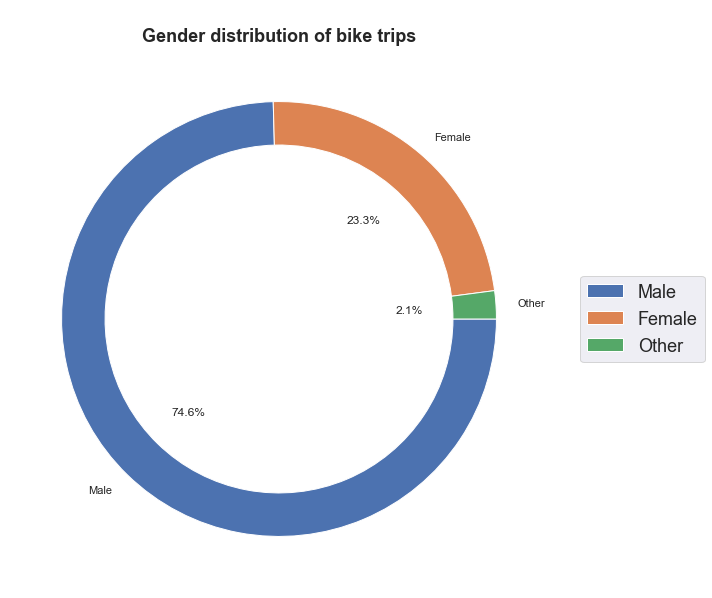

In [7]:
member_gender_counts = df['member_gender'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(member_gender_counts,
        labels = member_gender_counts.index,  
        counterclock = False, 
        autopct = '%1.1f%%',
        wedgeprops = {'width' : 0.2})
plt.legend(loc="center right", bbox_to_anchor=(1.3,0.5) ,fontsize=18)
plt.title('\nGender distribution of bike trips',  
          fontsize = 18, 
          fontweight = 'bold')
plt.show()

## User types distribution of bike trips

The user types distribution of bike trips was (90.5%) are subscriber, while customer are (9.5%).

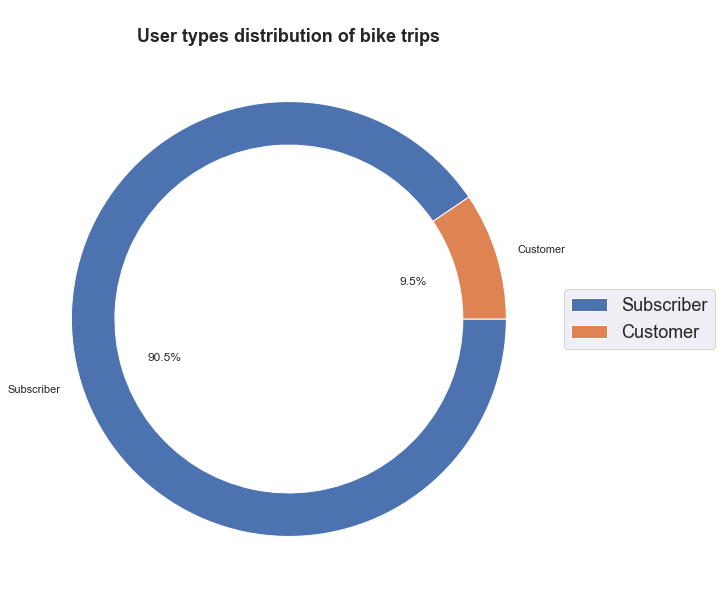

In [8]:
user_type_counts = df['user_type'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(user_type_counts,
        labels = user_type_counts.index,  
        counterclock = False, 
        autopct = '%1.1f%%',
        wedgeprops = {'width' : 0.2})
plt.legend(loc="center right", bbox_to_anchor=(1.3,0.5) ,fontsize=18)
plt.title('\nUser types distribution of bike trips',  
          fontsize = 18, 
          fontweight = 'bold')
plt.show()

## Average bike trip duration in minutes per user type

The average bike trip duration in minutes per user type was (10.679922) are subscriber, while customer are (21.847536).

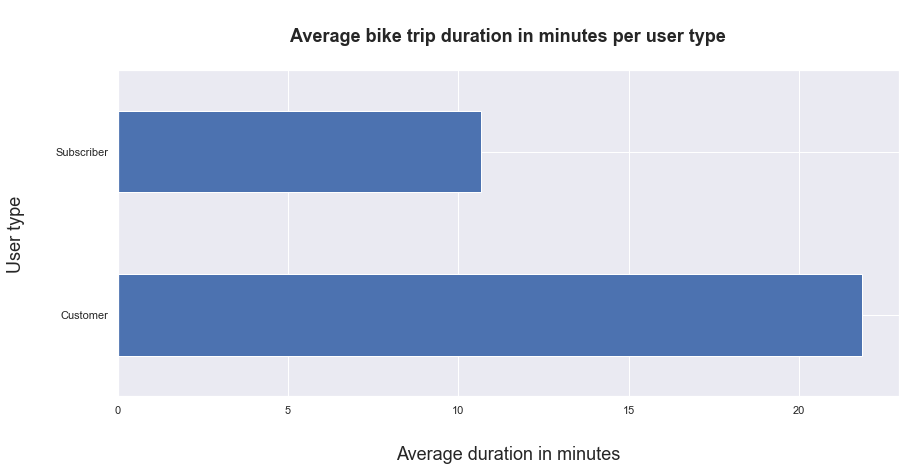

In [9]:
user_duration_average = df.groupby('user_type')['duration_minutes'].mean()

user_duration_average.plot(kind = 'barh')

plt.title('\nAverage bike trip duration in minutes per user type', 
          y = 1.07, 
          fontsize = 18, 
          fontweight = 'bold')
plt.xlabel('Average duration in minutes', 
           fontsize = 18, 
           labelpad=30)
plt.ylabel('User type', 
           fontsize = 18, 
           labelpad=30)
plt.show()

## Distribution of bike trip duration in minutes per user type

The distribution of bike trip duration in minutes per user type was the distribution of customer trip time shows more variability than subscribers.

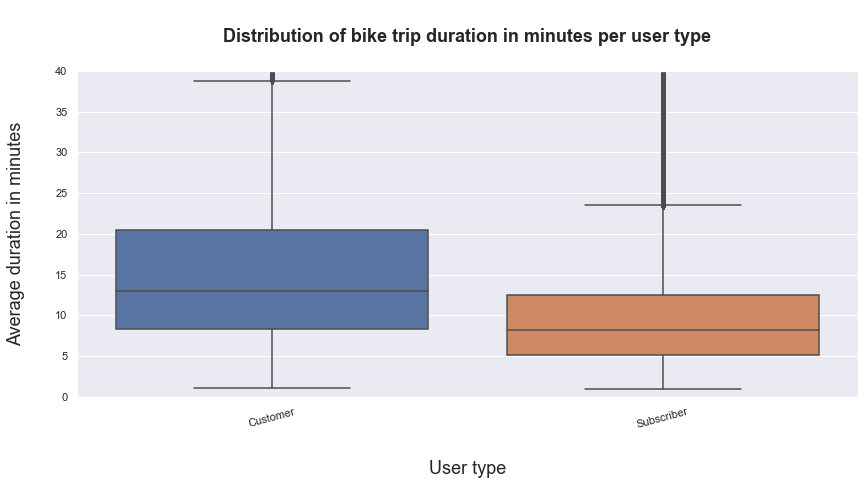

In [10]:
sns.boxplot(data= df, x = 'user_type', y = 'duration_minutes') 

plt.xticks(rotation=15) 

plt.ylim(0,40)

plt.title('\nDistribution of bike trip duration in minutes per user type', 
          y = 1.07, 
          fontsize = 18, 
          fontweight = 'bold')
plt.xlabel('User type', 
           fontsize = 18, 
           labelpad=30)
plt.ylabel('Average duration in minutes', 
           fontsize = 18, 
           labelpad=30)
plt.show()

## Number of bike trips gender per user type

The number of bike trips gender per user type was a subscribers bigger than customers.

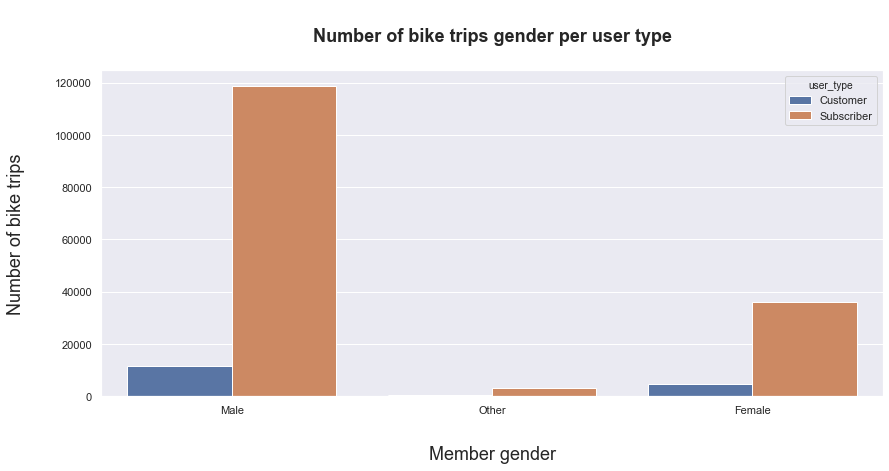

In [11]:
sns.countplot(x = df['member_gender'], hue = df['user_type'])

plt.title('\nNumber of bike trips gender per user type', 
          y = 1.07, 
          fontsize = 18, 
          fontweight = 'bold')
plt.xlabel('Member gender', 
           fontsize = 18, 
           labelpad=30)
plt.ylabel('Number of bike trips', 
           fontsize = 18, 
           labelpad=30)
plt.show()

## Customer vs. Subscriber frequency of bike trips used per week day

The number of bike trips for subscribers is higher on work days (Monday, Tuesday, Wednesday, Thursday, Friday) and lower on weekends days (Saturday, Sunday) in San Francisco.

The number of bike trips for customers is consistent on all week days in San Francisco.

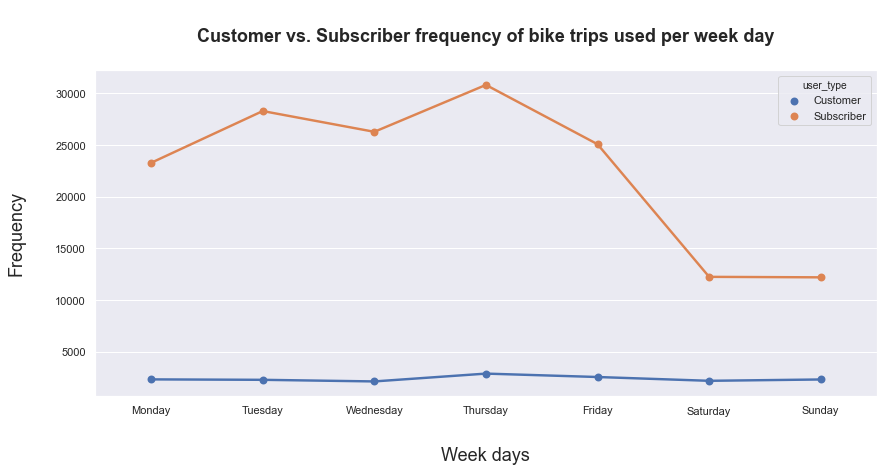

In [12]:
frequency1 = df.groupby(['week_day', 'user_type']).size().reset_index()
frequency1.columns = frequency1.columns[:2].append(pd.Index(['frequency']))

sns.pointplot(data=frequency1, x='week_day', y='frequency', hue = 'user_type', scale=.9);

plt.title('\nCustomer vs. Subscriber frequency of bike trips used per week day', 
          y = 1.07, 
          fontsize = 18, 
          fontweight = 'bold')
plt.xlabel('Week days', 
           fontsize = 18, 
           labelpad=30)
plt.ylabel('Frequency', 
           fontsize = 18, 
           labelpad=30)
plt.show()

## The relation between the hour of day, bike trip duration in seconds, and member gender

Male customers take longer bike trips than female customers.

Males take long bike trips from 11 AM to 4 PM.

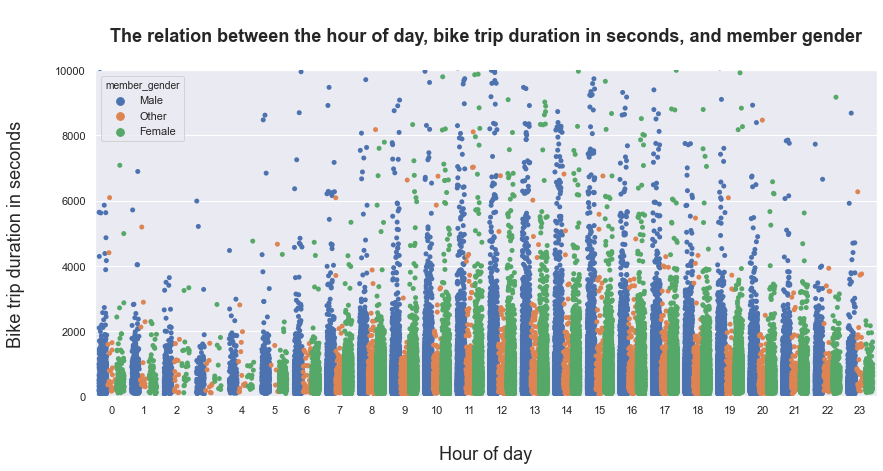

In [13]:
sns.stripplot(data = df, x = 'start_hour' , y = 'duration_sec', hue = 'member_gender', jitter = 0.35, dodge = True)

plt.ylim(0,10000)

plt.title('\nThe relation between the hour of day, bike trip duration in seconds, and member gender', 
          y = 1.07, 
          fontsize = 18, 
          fontweight = 'bold')

plt.xlabel('Hour of day', 
           fontsize = 18, 
           labelpad=30)
plt.ylabel('Bike trip duration in seconds', 
           fontsize = 18, 
           labelpad=30)
plt.show()

## The relation between the hour of day, bike trip duration in seconds, and user type

Subscribers take long bike trips from 11 AM to 5 PM.

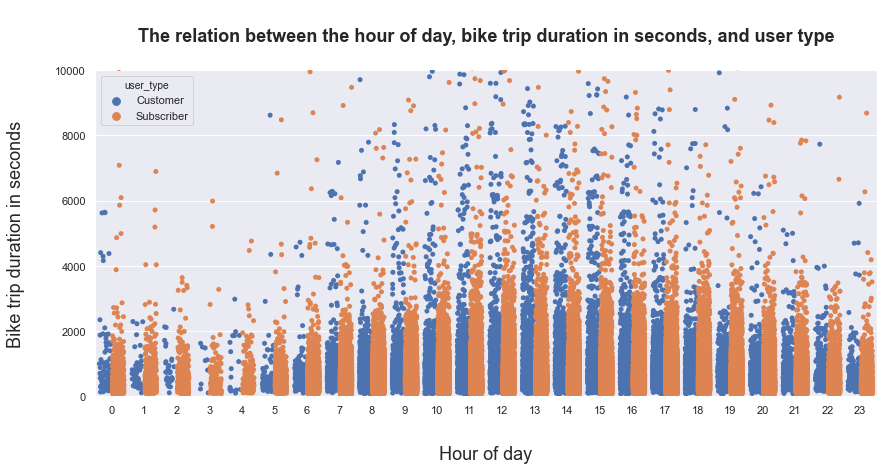

In [14]:
sns.stripplot(data = df, x = 'start_hour' , y = 'duration_sec', hue = 'user_type', jitter = 0.35, dodge = True)

plt.ylim(0,10000)

plt.title('\nThe relation between the hour of day, bike trip duration in seconds, and user type', 
          y = 1.07, 
          fontsize = 18, 
          fontweight = 'bold')

plt.xlabel('Hour of day', 
           fontsize = 18, 
           labelpad=30)
plt.ylabel('Bike trip duration in seconds', 
           fontsize = 18, 
           labelpad=30)
plt.show()